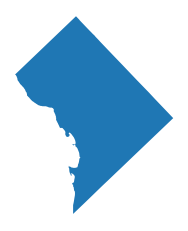

In [2]:
import folium
import openrouteservice as ors

%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps


import pandas as pd
import osmnx as ox
city = ox.geocode_to_gdf('Washington, D.C.')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

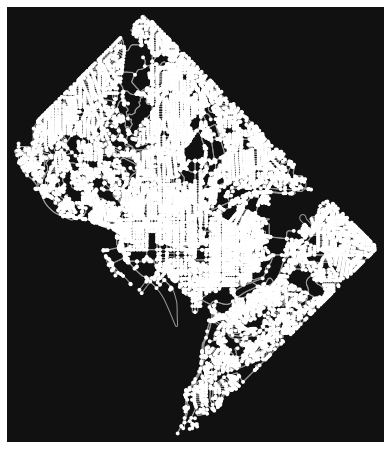

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
G = ox.graph_from_place('Washington, D.C.', network_type='drive')
ox.plot_graph(G)

In [4]:
G2 = ox.consolidate_intersections(G, tolerance=10, rebuild_graph=True, dead_ends=True)


C:\Users\Monty\.conda\envs\ox\lib\site-packages\osmnx\simplification.py:417: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = utils_graph.graph_to_gdfs(G, edges=False)["geometry"].buffer(tolerance).unary_union
C:\Users\Monty\.conda\envs\ox\lib\site-packages\osmnx\simplification.py:466: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


In [5]:
G = ox.project_graph(ox.graph_from_place('Washington D.C., USA', network_type='drive'))
G2 = ox.consolidate_intersections(G, tolerance=10, rebuild_graph=True, dead_ends=True)

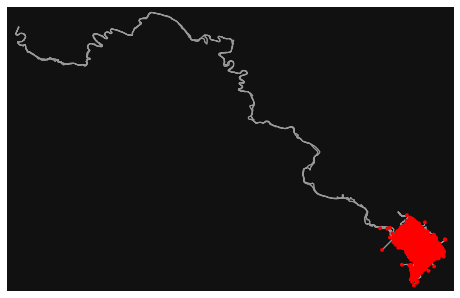

In [6]:
G = ox.graph_from_xml("district-of-columbia-latest.osm.bz2")
fig, ax = ox.plot_graph(G, node_color="r")

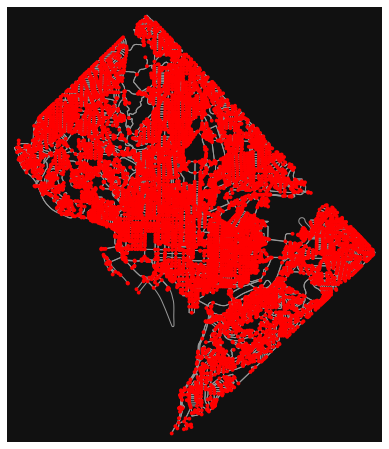

In [7]:
fig, ax = ox.plot_graph(G2, node_color="r")

In [8]:
### The line is for the Potomac river

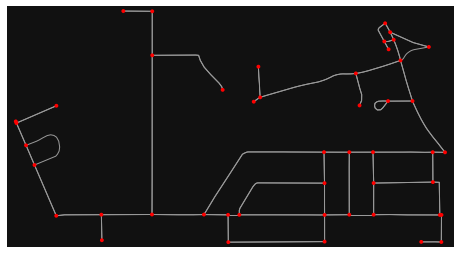

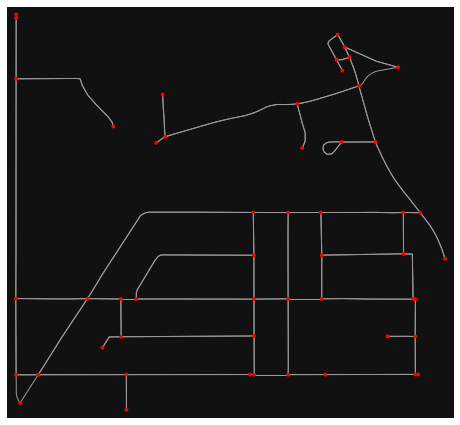

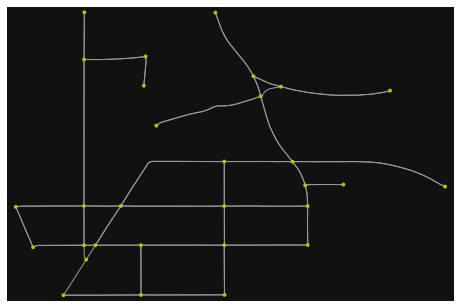

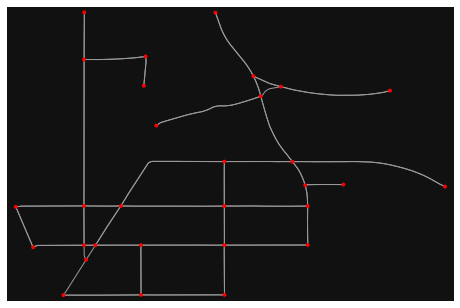

In [9]:
# define a bounding box in DC
north, south, east, west = 38.937679, 38.941212, -77.075133, -77.066525

north1, south1, east1, west1 = 38.941243, 38.936841, -77.072454, -77.066446

# create network from that bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
G0 = ox.graph_from_bbox(north1, south1, east1, west1, network_type="drive_service")
G1 = ox.graph.graph_from_bbox(north1, south1, east1, west1, network_type='drive', 
                              simplify=True, retain_all=True, truncate_by_edge=True, 
                              clean_periphery=True, custom_filter=None)
G2 = ox.graph.graph_from_bbox(north1, south1, east1, west1, network_type='drive', 
                              simplify=True, retain_all=False, truncate_by_edge=True, 
                              clean_periphery=True, custom_filter=None)

# G3 = ox.graph.graph_from_bbox(north1, south1, east1, west1, network_type='drive', 
#                               simplify=False, retain_all=True, truncate_by_edge=True,
#                               clean_periphery=True, custom_filter=None)
# G4 = ox.graph.graph_from_bbox(north1, south1, east1, west1, network_type='drive', 
#                               simplify=False, retain_all=False, truncate_by_edge=True, 
#                               clean_periphery=True, custom_filter=None)
fig, ax = ox.plot_graph(G, node_color="r") #Big box unsimplified
fig, ax = ox.plot_graph(G0, node_color="r") #Choosing a smaller box 
fig, ax = ox.plot_graph(G1, node_color="y") #Simplifying the small box
fig, ax = ox.plot_graph(G2, node_color="r") #Checking if all the key points are retained or not (just a trial thing)
# fig, ax = ox.plot_graph(G3, node_color="y")
# fig, ax = ox.plot_graph(G4, node_color="r")

In [10]:
G1.nodes

NodeView((49735507, 49748328, 49748340, 49748353, 49753268, 49753270, 49753272, 49753274, 49753280, 49756456, 49768086, 49774596, 49774604, 49774723, 49774762, 49780129, 49780193, 49784202, 49789979, 49789983, 49802368, 49802377, 49802395, 49805645, 49843926, 49843934, 49858900, 49869544, 49876232, 49884932))

In [11]:
G1.nodes[49735507]

{'y': 38.936283, 'x': -77.072975, 'street_count': 3}

In [12]:
df = pd.DataFrame()
Nodes = []

In [13]:
Nodes = []
for i in G1.nodes:
    Nodes.append(i)
df = pd.DataFrame(Nodes)
df.rename(columns = {0:'Nodes'}, inplace = True)

In [14]:
df = pd.DataFrame(Nodes)

In [15]:
df.rename(columns = {0:'Nodes'}, inplace = True)

In [16]:
lats = []
longs = []

for i in Nodes:
    lats.append(G1.nodes[i].get('y'))
    longs.append(G1.nodes[i].get('x'))
    
df['Latitude'] = lats
df['Longitude'] = longs

In [17]:
df.head()

,Nodes,Latitude,Longitude
0,49735507,38.936283,-77.072975
1,49748328,38.937335,-77.066387
2,49748340,38.938151,-77.066389
3,49748353,38.938586,-77.066455
4,49753268,38.937332,-77.068636


In [18]:
df1 = pd.DataFrame()
Nodes = []

Nodes = []
for i in G1.nodes:
    Nodes.append(i)
df1 = pd.DataFrame(Nodes)
df1.rename(columns = {0:'Nodes'}, inplace = True)

df1 = pd.DataFrame(Nodes)

df1.rename(columns = {0:'Nodes'}, inplace = True)

lats = []
longs = []

for i in Nodes:
    lats.append(G1.nodes[i].get('y'))
    longs.append(G1.nodes[i].get('x'))
    
df1['Latitude'] = lats
df1['Longitude'] = longs

df1.head()

subset = df1[['Latitude', 'Longitude']]
tuples = [tuple(x) for x in subset.to_numpy()]

print(tuples)

[(38.936283, -77.072975), (38.937335, -77.066387), (38.938151, -77.066389), (38.938586, -77.066455), (38.937332, -77.068636), (38.937332, -77.070886), (38.937331, -77.072112), (38.93733, -77.072418), (38.937287, -77.073793), (38.938602, -77.065426), (38.93856, -77.062684), (38.941291, -77.07076), (38.941226, -77.072418), (38.940573, -77.064167), (38.940656, -77.067109), (38.940455, -77.067653), (38.939839, -77.07047), (38.936288, -77.070882), (38.9422087, -77.0688763), (38.942216, -77.072411), (38.937027, -77.072362), (38.938154, -77.071426), (38.940676, -77.070807), (38.936289, -77.06863), (38.939083, -77.066799), (38.939085, -77.068636), (38.938152, -77.068636), (38.938155, -77.072423), (38.938136, -77.07426), (38.940876, -77.067852)]


In [19]:
map_geocode = folium.Map(location=[38.97286421371762, -77.06145286560059], tiles='cartodbpositron', zoom_start=13)
coords = [
    [-77.06145286560059,38.97286421371762],[-77.0608788728714,38.967058592160974],[-77.05748319625854,38.961027248630586],
    [-77.06758975982666,38.95940879245423],[-77.0616888999939,38.94095244130547]
]

client = ors.Client(key='5b3ce3597851110001cf6248fc30f10b77b5410dab564eac271c1b0d') # Specify your personal API key
#routes = client.directions(coords)

routes = client.directions(coords, optimize_waypoints=True, format='geojson') 
#optimization requires at least 4 or more coordinates. 
#Take the entire coords of the city itself

print(routes)

map_directions = folium.Map(location=[38.936283, -77.072975 ], zoom_start=15)

folium.GeoJson(routes, name='routes').add_to(map_directions)
folium.LayerControl().add_to(map_directions)
map_directions

{'type': 'FeatureCollection', 'features': [{'bbox': [-77.070411, 38.940966, -77.056189, 38.972861], 'type': 'Feature', 'properties': {'segments': [{'distance': 755.1, 'duration': 95.1, 'steps': [{'distance': 3.9, 'duration': 0.9, 'type': 11, 'instruction': 'Head southwest on 31st Place Northwest', 'name': '31st Place Northwest', 'way_points': [0, 1]}, {'distance': 212.5, 'duration': 51.0, 'type': 6, 'instruction': 'Continue straight onto 31st Place Northwest', 'name': '31st Place Northwest', 'way_points': [1, 7]}, {'distance': 538.2, 'duration': 43.1, 'type': 0, 'instruction': 'Turn left onto Utah Avenue Northwest', 'name': 'Utah Avenue Northwest', 'way_points': [7, 22]}, {'distance': 0.4, 'duration': 0.1, 'type': 1, 'instruction': 'Turn right onto Nebraska Avenue Northwest', 'name': 'Nebraska Avenue Northwest', 'way_points': [22, 23]}, {'distance': 0.0, 'duration': 0.0, 'type': 10, 'instruction': 'Arrive at Nebraska Avenue Northwest, on the left', 'name': '-', 'way_points': [23, 23]}]

In [20]:
df.to_csv("Cluster.csv")

In [21]:
G1.nodes[49735507]


{'y': 38.936283, 'x': -77.072975, 'street_count': 3}

In [22]:
ox.stats.basic_stats(G1, area=None, clean_int_tol=None, clean_intersects=None, tolerance=None, circuity_dist=None)

{'n': 30,
 'm': 74,
 'k_avg': 4.933333333333334,
 'edge_length_total': 10596.030000000002,
 'edge_length_avg': 143.18959459459464,
 'streets_per_node_avg': 3.3333333333333335,
 'streets_per_node_counts': {0: 0, 1: 2, 2: 0, 3: 14, 4: 14},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.06666666666666667,
  2: 0.0,
  3: 0.4666666666666667,
  4: 0.4666666666666667},
 'intersection_count': 28,
 'street_length_total': 5411.8910000000005,
 'street_segment_count': 39,
 'street_length_avg': 138.7664358974359,
 'circuity_avg': 1.0101224337798829,
 'self_loop_proportion': 0.0}

In [23]:
import networkx as nx

In [24]:
G1.nodes

NodeView((49735507, 49748328, 49748340, 49748353, 49753268, 49753270, 49753272, 49753274, 49753280, 49756456, 49768086, 49774596, 49774604, 49774723, 49774762, 49780129, 49780193, 49784202, 49789979, 49789983, 49802368, 49802377, 49802395, 49805645, 49843926, 49843934, 49858900, 49869544, 49876232, 49884932))

In [25]:
# g11 = ox.truncate.truncate_graph_polygon(G1, polygon, retain_all=False, truncate_by_edge=False, quadrat_width=0.05, min_num=3)
g12 = ox.truncate.truncate_graph_dist(G1, 49735507, max_dist=1000, weight='length', retain_all=False)
# g13 = ox.truncate.truncate_graph_bbox(G1, north, south, east, west, truncate_by_edge=True, retain_all=True, quadrat_width=0.15, min_num=1)

In [26]:
g12.nodes

NodeView((49735507, 49748328, 49748340, 49748353, 49753268, 49753270, 49753272, 49753274, 49753280, 49756456, 49774596, 49774604, 49774762, 49780129, 49784202, 49789983, 49802368, 49802377, 49802395, 49805645, 49843926, 49843934, 49858900, 49869544, 49876232, 49884932))

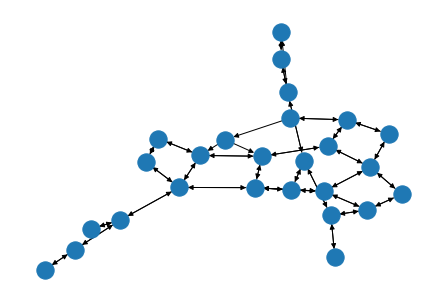

In [27]:
# With retain = False
nx.draw(g12)
plt.savefig("filename.png")

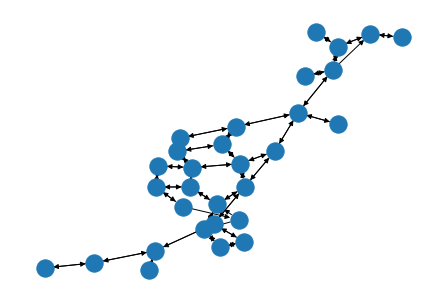

In [30]:
nx.draw(G1)

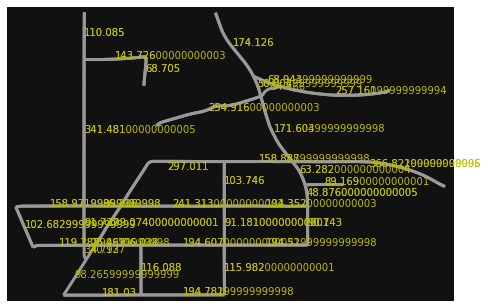

In [31]:
#normal graph distances
fig, ax = ox.plot_graph(G1, edge_linewidth=3, node_size=0, show=False, close=False)
for _, edge in ox.graph_to_gdfs(G2, nodes=False).fillna("").iterrows():
    text = edge["length"]
    c = edge["geometry"].centroid
    ax.annotate(text, (c.x, c.y), c="y")
plt.show()

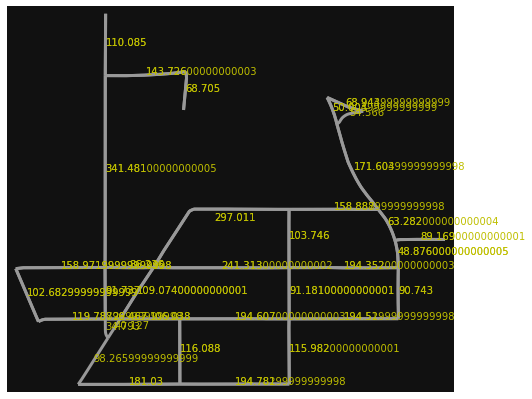

In [32]:
#truncated graph distances
fig, ax = ox.plot_graph(g12, edge_linewidth=3, node_size=0, show=False, close=False)
for _, edge in ox.graph_to_gdfs(g12, nodes=False).fillna("").iterrows():
    text = edge["length"]
    c = edge["geometry"].centroid
    ax.annotate(text, (c.x, c.y), c="y")
plt.show()

In [68]:
G1.edges.data("length")

OutMultiEdgeDataView([(49735507, 49784202, 181.03), (49735507, 49802368, 98.26599999999999), (49748328, 49748340, 90.743), (49748328, 49753268, 194.52), (49748340, 49858900, 194.352), (49748340, 49748353, 48.876000000000005), (49748340, 49748328, 90.743), (49748353, 49756456, 89.16900000000001), (49748353, 49748340, 48.876000000000005), (49748353, 49843926, 63.282000000000004), (49753268, 49858900, 91.18100000000001), (49753268, 49805645, 115.98200000000001), (49753268, 49753270, 194.60700000000003), (49753268, 49748328, 194.51999999999998), (49753270, 49753272, 106.038), (49753270, 49784202, 116.088), (49753270, 49753268, 194.607), (49753272, 49753270, 106.038), (49753272, 49753274, 26.467), (49753272, 49802377, 109.07400000000001), (49753274, 49869544, 91.737), (49753274, 49753272, 26.467), (49753274, 49753280, 119.78799999999998), (49753280, 49876232, 102.68299999999999), (49753280, 49753274, 119.788), (49756456, 49748353, 89.169), (49768086, 49843926, 366.82199999999995), (49774596

In [72]:
G1.number_of_nodes()

30

In [127]:
nodeslist = list(G1.nodes)
node1 = nodeslist[0]

[print(node) for node in nodeslist]

49735507
49748328
49748340
49748353
49753268
49753270
49753272
49753274
49753280
49756456
49768086
49774596
49774604
49774723
49774762
49780129
49780193
49784202
49789979
49789983
49802368
49802377
49802395
49805645
49843926
49843934
49858900
49869544
49876232
49884932


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [114]:
#cost using networkx

p = dict(nx.shortest_path_length(G1)) 

print(p)

{49735507: {49735507: 0, 49802368: 1, 49784202: 1, 49805645: 2, 49753270: 2, 49753272: 2, 49753274: 2, 49753280: 3, 49869544: 3, 49802377: 3, 49753268: 3, 49876232: 4, 49748328: 4, 49774604: 4, 49858900: 4, 49843934: 4, 49774596: 5, 49748340: 5, 49843926: 5, 49789983: 5, 49748353: 6, 49780129: 6, 49768086: 6, 49802395: 6, 49780193: 7, 49884932: 7, 49756456: 7, 49774762: 7, 49774723: 8, 49789979: 8}, 49748328: {49748328: 0, 49753268: 1, 49748340: 1, 49748353: 2, 49805645: 2, 49858900: 2, 49753270: 2, 49756456: 3, 49802377: 3, 49784202: 3, 49843926: 3, 49753272: 3, 49843934: 3, 49780129: 4, 49869544: 4, 49735507: 4, 49768086: 4, 49753274: 4, 49802368: 5, 49780193: 5, 49753280: 5, 49884932: 5, 49876232: 5, 49774762: 5, 49774604: 5, 49774723: 6, 49774596: 6, 49789979: 6, 49789983: 6, 49802395: 7}, 49748340: {49748340: 0, 49748328: 1, 49748353: 1, 49858900: 1, 49756456: 2, 49802377: 2, 49753268: 2, 49843926: 2, 49843934: 2, 49780129: 3, 49869544: 3, 49805645: 3, 49753270: 3, 49768086: 3, 49

In [133]:
# cost using the actual distance
nodeslist = list(G1.nodes)

node1 = nodeslist[0]
edges = ox.graph_to_gdfs(G1, nodes=False, edges=True)
i = 0

for i in range(len(nodeslist)):
    for j in range(len(nodeslist)):
        length = nx.shortest_path_length(G=G1, source=nodeslist[i], target=nodeslist[j], weight='length')
        print(length)
    print()

0
633.558
683.1320000000001
732.008
439.038
244.43099999999998
138.393
133.059
252.84699999999998
821.177
1070.188
710.003
566.277
1186.6970000000001
929.5360000000001
874.97
1129.886
181.03
1099.1000000000001
676.3620000000001
98.26599999999999
247.467
778.7080000000001
375.812
703.366
544.4780000000001
488.78
224.796
355.53
924.974

686.245
0
90.743
139.619
194.52
389.12700000000007
495.1650000000001
521.6320000000001
641.4200000000001
228.788
569.7230000000001
1097.851
954.125
686.232
429.071
374.505
629.421
505.21500000000003
598.635
1064.21
784.511
526.408
1166.556
310.502
202.901
361.789
285.095
612.644
744.1030000000001
424.509

776.988
90.743
0
48.876000000000005
285.26300000000003
479.87000000000006
544.739
571.206
690.994
138.04500000000002
478.9800000000001
1007.1080000000001
863.3820000000001
595.489
338.328
283.762
538.678
595.9580000000001
507.89199999999994
973.4670000000001
875.254
435.665
1075.813
401.24500000000006
112.15800000000002
271.04600000000005
194.352
521.901